| |<font size="5">Classification  _  تصنيف البيانات </font>|
|-:|-:|
|<img src="https://e7.pngegg.com/pngimages/372/528/png-clipart-four-assorted-color-mushrooms-mushroom-fungus-mushroom-photography-grass-thumbnail.png" width=250></img>||
||<font size="4"> تحميل البيانات  </font>| 
||<font size="4">  تحديد تسلسل معالجة البيانات</font>| 
||<font size="4">XGBClassifier & PCA  تدريب البيانات وتقليص خصائصها </font>|
||<font size="4"> تقويم أداء الخوارزميات </font>| 

In [ ]:
pwd

'/content/drive/My Drive/ML-Course'

In [ ]:
cd  drive/My\ Drive/ML-Course

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

#  https://archive.ics.uci.edu/ml/datasets/mushroom    يمكن تحميل البيانات من الموقع التالي 

df = pd.read_csv('./data/mushroom_data_all.csv')


In [ ]:
df.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.class_edible.value_counts()

e    4208
p    3916
Name: class_edible, dtype: int64

In [ ]:
# p :  Poisonous
# e:  Edidable 

In [ ]:
df.keys()

Index(['class_edible', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
for key in df.keys():
    print(key, df[key].unique())

class_edible ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [ ]:
#  وجب التخلص من البيانات التي لا تتغير او تلك التي تتغير بمقدار بسيط 
df["veil-type"].unique()

array(['p'], dtype=object)

In [ ]:
df.drop(["veil-type"], axis=1,  inplace=True)

In [ ]:
#   يلاحظ تواجد عديد الخصائص الثنائية
# والتي وجب ترميزها دون السقوط في التكرار

In [ ]:
# تحديد الخصائص والهدف
X=df.drop("class_edible", axis=1)
y=df.class_edible

In [ ]:
# تقسيم البيانات :  تدريب &  اختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)

In [ ]:
# حجم البيانات 
X_train.shape, X_test.shape

((5443, 21), (2681, 21))

In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector

from sklearn.pipeline import make_pipeline
  

cat_pipeline= make_pipeline(
    OneHotEncoder(drop='if_binary', sparse=False)  #      اسقاط احد العمودين في حالة المتغير الثنائي
)

preprocess= make_column_transformer(
     (cat_pipeline, selector(dtype_include="object")) , #category  كان بالامكان تغيير  نوع المتغيرات الى تصنيف  
     remainder="passthrough"  # واسقاط باقي البيانات الغير رقمية 
     )

In [ ]:
# التحقق من تحويل  البيانات 
preprocess.fit_transform(X_train)[1]

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
# حجم  البيانات 
preprocess.fit_transform(X_train).shape

(5443, 111)

In [ ]:

#  هيكل نموذج خوارزمية التنبؤ
from xgboost  import XGBClassifier
from sklearn.decomposition import PCA  
pipe_XGBCl= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية 
    PCA( ),  #    يعوض لاحقا ضمن المعايير أدناه 

    XGBClassifier()
)

In [ ]:
from sklearn import set_config
set_config(display='diagram', )

In [ ]:
# تدريب البيانات
pipe_XGBCl.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f29c99dd438>)])),
                ('pca', PCA()), ('xgbclassifier', XGBClassifier())])

In [ ]:
#pipeline  معايير  
list(pipe_XGBCl.get_params().keys())

['memory',
 'steps',
 'verbose',
 'columntransformer',
 'pca',
 'xgbclassifier',
 'columntransformer__n_jobs',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__pipeline',
 'columntransformer__pipeline__memory',
 'columntransformer__pipeline__steps',
 'columntransformer__pipeline__verbose',
 'columntransformer__pipeline__onehotencoder',
 'columntransformer__pipeline__onehotencoder__categories',
 'columntransformer__pipeline__onehotencoder__drop',
 'columntransformer__pipeline__onehotencoder__dtype',
 'columntransformer__pipeline__onehotencoder__handle_unknown',
 'columntransformer__pipeline__onehotencoder__sparse',
 'pca__copy',
 'pca__iterated_power',
 'pca__n_components',
 'pca__random_state',
 'pca__svd_solver',
 'pca__tol',
 'pca__whiten',
 'xgbclassifier__base_score',
 'xgbclassifier__booster',
 'xgbclassifier__colsample_bylevel'

In [ ]:
param_grid = {
   'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgbclassifier__max_depth': range(3, 5),
    'xgbclassifier__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'xgbclassifier__gamma': [i/10.0 for i in range(3)],
    'pca__n_components':[40, 60, 80]

}

In [ ]:
# Define cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)


In [ ]:
# AUC and accuracy as score
from sklearn.metrics import accuracy_score, make_scorer
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}



In [ ]:
# %%timeit
from sklearn.model_selection import RandomizedSearchCV
gridSearch = RandomizedSearchCV(pipe_XGBCl, param_distributions=param_grid, cv=kf, verbose=3, n_jobs=-1 ,scoring= scoring  , n_iter=1000, refit="AUC" )

In [ ]:
# التدريب
gridSearch.fit(X_train, y_train)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 576 is smaller than n_iter=1000. Running 576 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 22.8min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipeline',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(drop='if_binary',
                                                                                                              sparse=False))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f29c99dd438>)])),...
                   param_distributions={'pca__n_components': [40, 60, 80],
                                        'xgbclassifier__colsample_bytree': [0.1,
                                                                            0.2],
                                        'xgbclassifier__gamma': [0.0, 0.1, 0.2],
                                        'xgbclassifier__learning_rate': [0.01,
                                                                         0.1,
                                                                         0.2,
                                                                         0.3],
                                        'xgbclassifier__max_depth': range(3, 5),
                                        'xgbclassifier__n_estimators': [50, 100,
                                                                        150,
                                                                        200]},
                   refit='AUC',
                   scoring={'AUC': 'roc_auc',
                            'Accuracy': make_scorer(accuracy_score)},
                   verbose=3)

In [ ]:
# افضل المعايير التي تم الاحتفاظ بها
gridSearch.best_params_ 

{'pca__n_components': 40,
 'xgbclassifier__colsample_bytree': 0.1,
 'xgbclassifier__gamma': 0.0,
 'xgbclassifier__learning_rate': 0.1,
 'xgbclassifier__max_depth': 4,
 'xgbclassifier__n_estimators': 150}

In [ ]:
#  قائمة أفضل المعاييير
gridSearch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f29c5aad3c8>)])),
                ('pca', PCA(n_components=40)),
                ('xgbclassifier',
                 XGBClassifier(colsample_bytree=0.1, gamma=0.0, max_depth=4,
                               n_estimators=150))])

In [ ]:
#AUC    قياس درجة  دقة  التنبؤ لمعيار 
print('Best AUC Score: {}'.format(gridSearch.best_score_))



Best AUC Score: 1.0


In [ ]:
y_pred=gridSearch.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 1.0


In [ ]:
# قياس الدقة في ضوء أفضل المعايير
gridSearch.best_estimator_.score(X_test, y_test)

1.0

In [ ]:
! pip install  scikit-plot

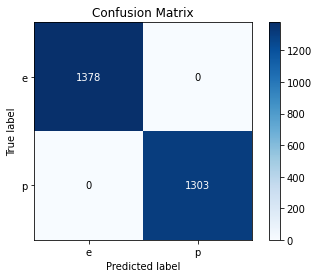

In [ ]:
#  Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred) #, normalize=True)

In [ ]:
# https://www.datacourses.com/classification-model-evaluation-metrics-in-scikit-learn-924/

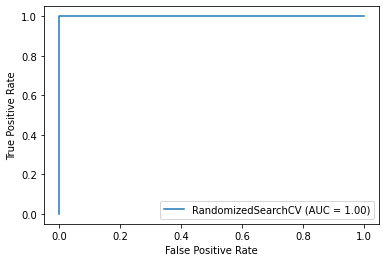

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(gridSearch, X_test, y_test)

A receiver operating characteristic (ROC) curve, is a diagnostic plot that visualizes the behavior of a binary classifier model by calculating the false positive rate and true positive rate by changing the model’s classification/discrimination thresholds. It is essentially a plot of signal (True Positive Rate) versus noise (False Positive Rate)

Going back to the basics, the threshold value is used to define which prediction probability is set to label a given test sample as predicted positive or predicted negative during the classification step. For most models, the default threshold value is 0.5.

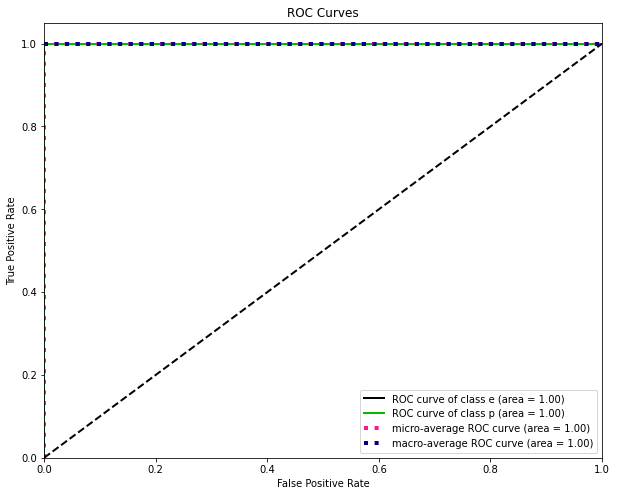

In [ ]:
#
y_probas = gridSearch.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

In [ ]:
y_probas = gridSearch.predict_proba(X_test)
y_probas[:3]

array([[0.99123937, 0.00876062],
       [0.00112587, 0.9988741 ],
       [0.00911772, 0.9908823 ]], dtype=float32)

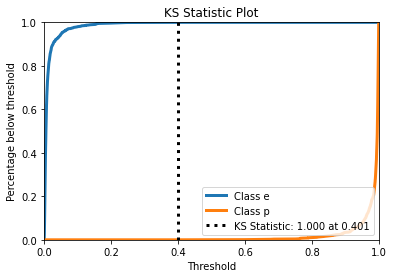

In [ ]:
# AUC تخطيط    
# The K-S statistic plot, or the Kolmogorov Smirnov statistic plot, is a plot that tells you whether the model gets confused 
#when it comes to predicting the different labels in your dataset

skplt.metrics.plot_ks_statistic(y_test, y_probas)

In [ ]:
print ('ROC AUC =', metrics.roc_auc_score(y_test, y_probas[:,1]))

ROC AUC = 1.0


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1378
           p       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [ ]:
#  تخطيط  التعلّم 
skplt.estimators.plot_learning_curve(
 gridSearch,
 X_train,
 y_train,
 title="Classifier Learning Curve",
 scoring="f1",
 cv=5,
 shuffle=True,
 random_state=42,
 n_jobs=-1,
 figsize=(10, 8),
)

In [ ]:
# عرض جدول القيم التي تم التنبؤ بها ومقارنتها بتلك التي بالجدول الأصلي 
pd.DataFrame({"Predicted":y_pred, "Actual Value": y_test}).sample(6, random_state=10)

,Predicted,Actual Value
7265,p,p
1902,e,e
1480,e,e
2648,e,e
4333,p,p
245,e,e
